# Credit Card Fraud Detection


**Documentation**
1. Feature *Time* contains the seconds elapsed between each transaction and the first transaction in the dataset. 
2. The feature *Amount* is the transaction Amount.
3. Feature *Class* is the response variable and it takes value 1 in case of fraud and 0 otherwise.
4. Features V1, V2, … V28 are the principal components obtained with PCA. This means that these features are linear combinations of the original variables in the dataset and capture as much of the variation in the data as possible.
5. Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [124]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn

%matplotlib inline

In [125]:
data = pd.read_csv('./creditcard.csv')
df = pd.DataFrame(data)

In [126]:
df = pd.DataFrame(data)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


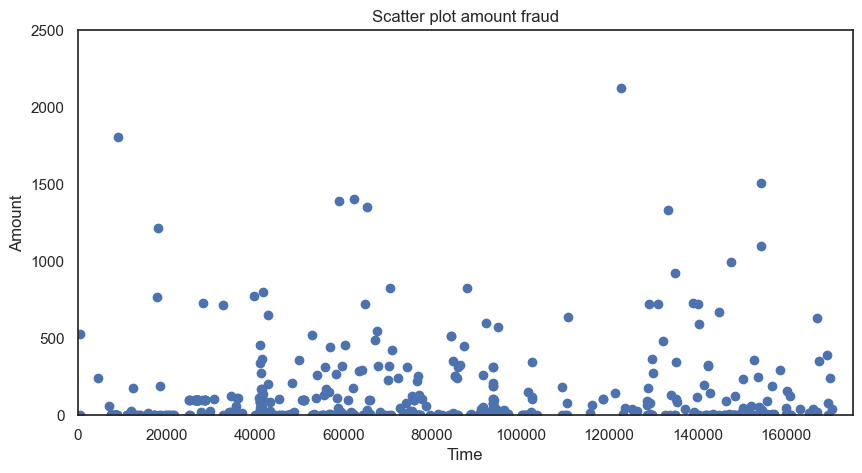

In [127]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(10,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scatter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [128]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print("Number of Frauds : " + str(number_fraud))
print("Number of Non Frauds : " + str(number_no_fraud))
print("Total List Length : "+str(len(df)))

Number of Frauds : 492
Number of Non Frauds : 284315
Total List Length : 284807


1. From the above text we can see that it *Unbalanced Data*. Which means we might achieve best accuracy possible from data.
2. *Oversampling* methods duplicate or create new synthetic examples in the minority class, whereas *Undersampling* methods delete or merge examples in the majority class.

**Correlation Of Features**
1. Correlation is a measure of the linear relationship between 2 or more variables. 
2. Through correlation, we can predict one variable from the other. 
3. The logic behind using correlation for feature selection is that good variables correlate highly with the target.
4. Furthermore, variables should be correlated with the target but uncorrelated among themselves.
5. If two variables are correlated, we can predict one from the other. 
6. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information.

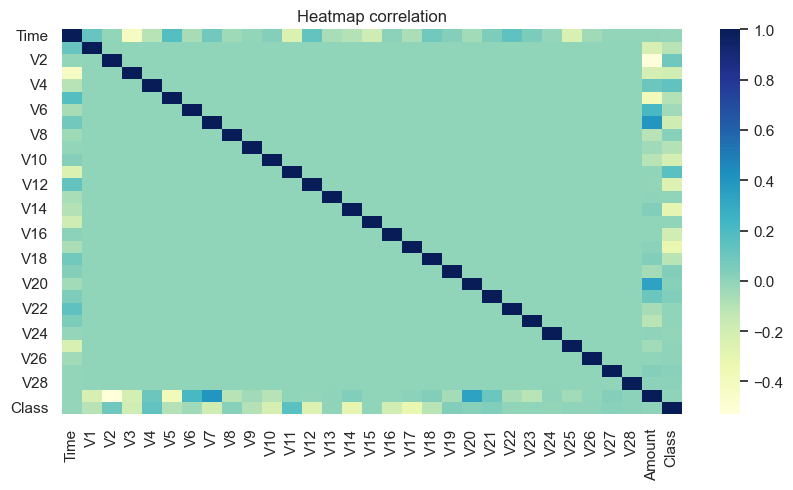

In [129]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
seaborn.heatmap(df_corr, cmap="YlGnBu")
seaborn.set(font_scale=1,style='white')
plt.title('Heatmap correlation')
plt.show()

• We can notice, most of the features are *not* correlated with each other.<br>
• By using a correlation matrix, you can get an idea about your data-set and analyze the data-set and also visualize the result

In [130]:
rank = df_corr['Class']
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False)
df_rank.dropna(inplace=True)

Rank is the maximum number of linearly independent columns in matrix.
This df_rank is nothing but the the values in descending order with all NaN values removed.

**Selected UnderSampling**

In [131]:
df_train_all = df[0:150000] # Splitting into half for Training and Testing
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('Number of Frauds :' + str(len(df_train_1)))
print('Number of Non Frauds :' + str(len(df_train_0)))

Number of Frauds :293
Number of Non Frauds :149707


In [132]:
df_sample = df_train_0.sample(300)
df_train = df_train_1.add(df_sample,fill_value=0)
df_train = df_train.sample(frac=1)

In [133]:
X_train_rank = df_train[df_rank.index[1:11]]
X_train_rank = np.asarray(X_train_rank)

Here we just add 300 samples from Non Frauds to Frauds list as we train

In [134]:
X_train = df_train.drop(['Time', 'Class'],axis=1)
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [135]:
df_test_all = df[150000:]
X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [136]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

**Confusion Matrix**

In [137]:
class_names=np.array(['0','1'])

In [138]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**SVM Model**

In [139]:
classifier = svm.SVC(kernel='linear')

In [140]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [141]:
prediction_SVM_all = classifier.predict(X_test_all)

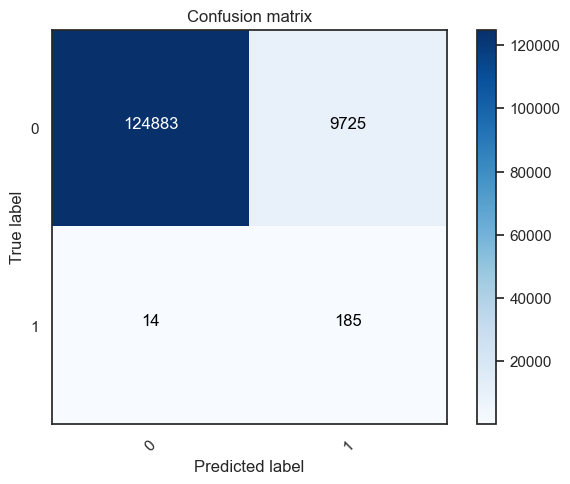

In [142]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [143]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.\n')
print('So, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
# Here cm[0][0] is classified as non frauds
# Here cm[1][1] is classified as frauds
ONE_OUT = (cm[0][0]+cm[1][1]) / sum(cm[0]) + sum(cm[1])

We have detected 185 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9296482412060302
the accuracy is : 0.9277559770635057


**ReBalancing Weights**
<br>
By modifying the class_weight parameter, we can chose which class to give more importance during the training phase. In this case, the class_1 which describes the fraudulent operations will be considered more important than the class_0 (non-fraud operation). However, in this case we will give more importance to the class_0 due to the large number of misclassed non-fraud operation.

This is done to reduce the false *Accusation* on non frauds.

In [144]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [145]:
classifier_b.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

In [146]:
prediction_SVM_b_all = classifier_b.predict(X_test_all)

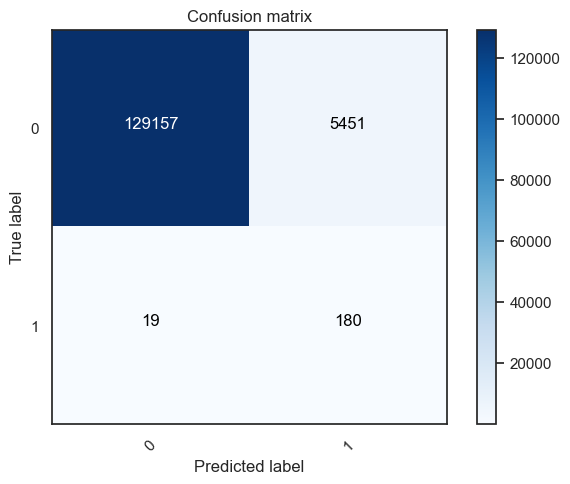

In [147]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [148]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
TWO_OUT = (cm[0][0]+cm[1][1]) / sum(cm[0]) + sum(cm[1])

We have detected 180 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9045226130653267
the accuracy is : 0.9594234720748922


To have more accuracy we can trian the model only on the ranked features.

In [149]:
classifier_b.fit(X_train_rank, y_train)
prediction_SVM = classifier_b.predict(X_test_all_rank)

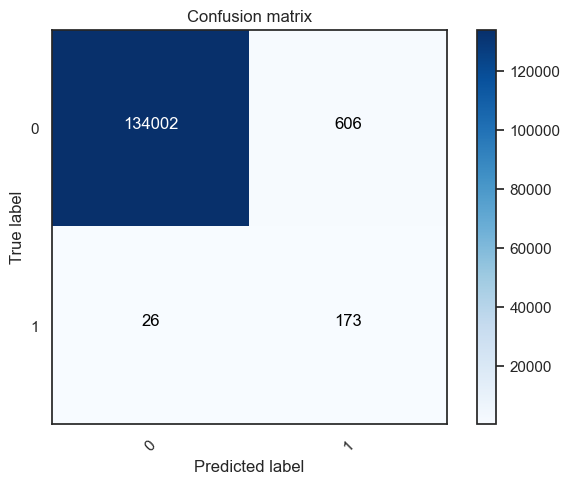

In [150]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [151]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
THREE_OUT = (cm[0][0]+cm[1][1]) / sum(cm[0]) + sum(cm[1])

We have detected 173 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.8693467336683417
the accuracy is : 0.9953118161519803


In [152]:
df['Class'].value_counts()
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
legit_sample = legit.sample(n=492)
new_df = pd.concat([legit_sample, fraud], axis=0)
x = new_df.drop(columns='Class', axis=1)
y = new_df['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [153]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [154]:
x_train_pred = model.predict(x_train)
training_data_acc = accuracy_score(x_train_pred,y_train)
print(f"Accuracy score of training data : {training_data_acc}")

Accuracy score of training data : 0.9491740787801779


In [155]:
x_test_pred = model.predict(x_test)
test_data_acc = accuracy_score(x_test_pred,y_test)
print(f"Accuracy score of testing data : {test_data_acc}")
FOUR_OUT = test_data_acc

Accuracy score of testing data : 0.9390862944162437


In [156]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

In [157]:
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
x_test_pred = clf.predict(x_test)
value = accuracy_score(x_test_pred, y_test)
print("Accuracy : ",value)
FIFTH_OUT = value

Accuracy :  0.9289340101522843


In [158]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
x_pred_val = clf.predict(x_test)
value = accuracy_score(x_pred_val, y_test)
print("Accuracy : ",value)
SIXTH_OUT = value

Accuracy :  0.9137055837563451
